In [450]:
# Importing the libraries:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from pprint import pprint
plt.rcParams['figure.figsize'] = [14,8]

%matplotlib inline

In [451]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Users\\atif7\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

In [452]:
def show_image(window_name, img):
    plt.title(window_name)
    plt.imshow(img)
    plt.show()
    

## Bordering image

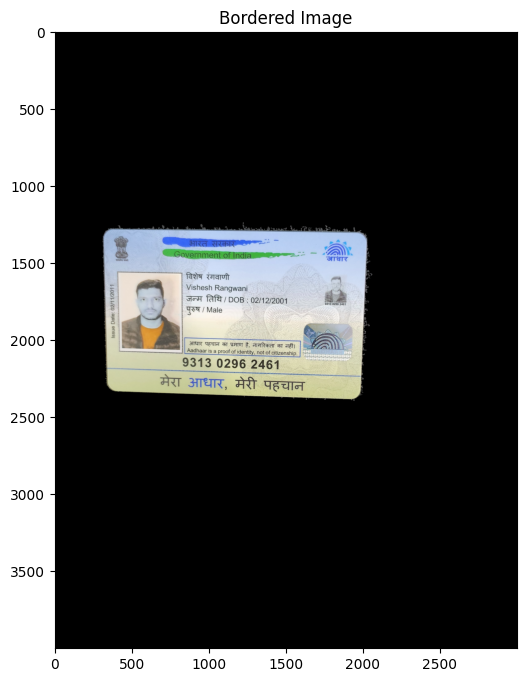

In [453]:
# Load image
image = cv2.imread('datasets\\20230507_114817.jpg').astype(np.uint8)

# Get contours
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the image
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Apply a threshold to the blurred image
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area
max_contour = max(contours, key=cv2.contourArea)
# show_image("Image", image)
# Draw contour on black background image
mask = np.zeros_like(gray)
cv2.drawContours(mask, [max_contour], 0, (255, 255, 255), -1)
# show_image("Mask", mask)
# Extract bordered image using mask
bordered_image = cv2.bitwise_and(image, image, mask=mask)

show_image("Bordered Image", bordered_image)
# plot_image("Plot Image", bordered_image)
plt.show()

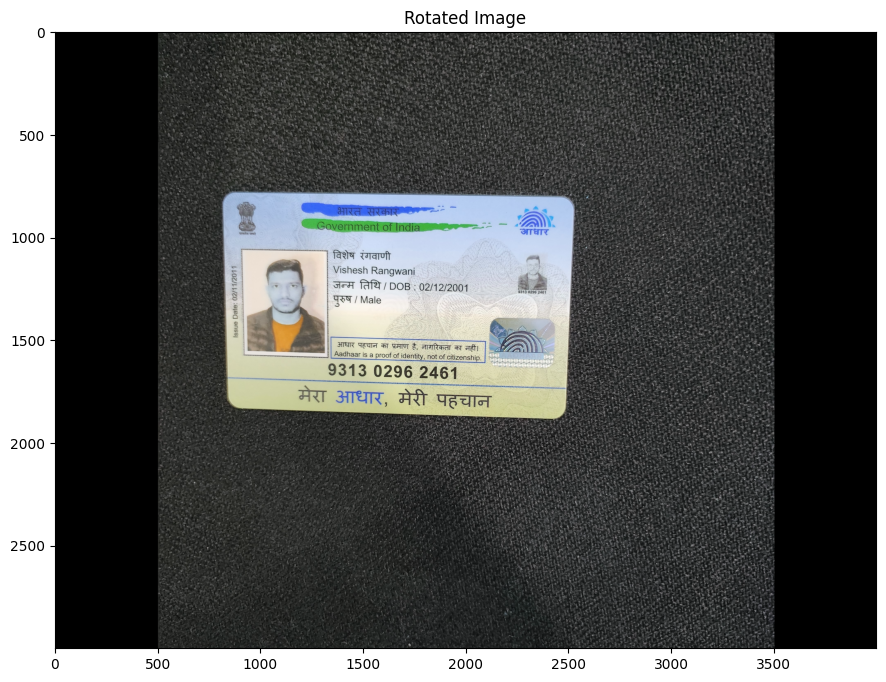

In [454]:
# Convert to grayscale
gray = cv2.cvtColor(bordered_image, cv2.COLOR_BGR2GRAY)

# Apply canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough line transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Find angles of lines with respect to horizontal axis
angles = []
for line in lines:
    rho, theta = line[0]
    if theta > np.pi/2:
        theta -= np.pi
    angle = np.degrees(theta)
    angles.append(angle)

# Rotate image by average angle
avg_angle = np.min(angles)
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_180)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
# rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)


rows, cols = rotated_image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), avg_angle, 1)
rotated_image = cv2.warpAffine(rotated_image, M, (cols, rows))

show_image("Rotated Image", rotated_image)

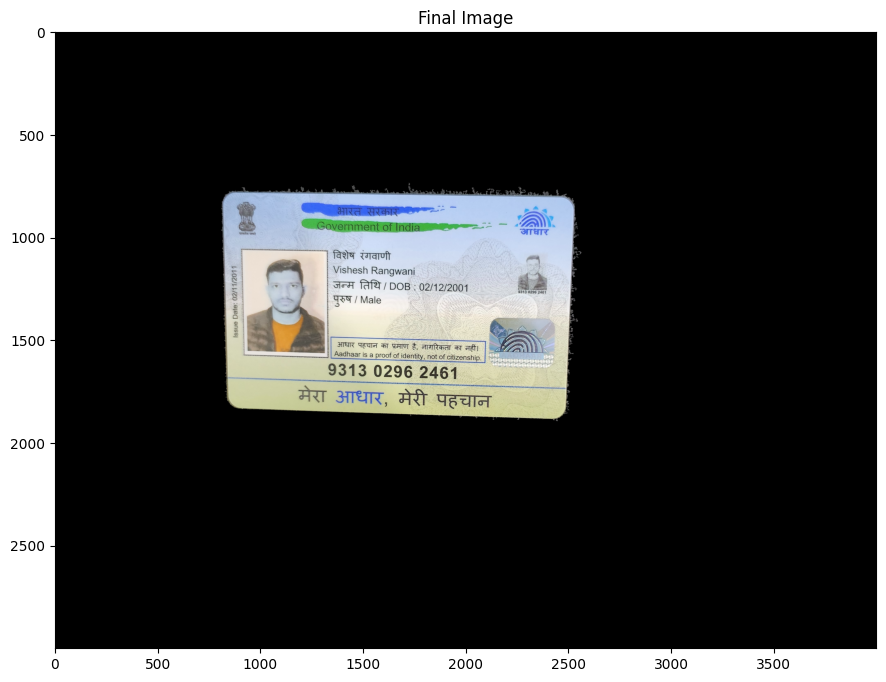

In [455]:
# Get contours
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area
max_contour = max(contours, key=cv2.contourArea)

# Draw contour on black background image
mask = np.zeros_like(gray)
cv2.drawContours(mask, [max_contour], 0, (255, 255, 255), -1)

# Extract bordered image using mask
final_image = cv2.bitwise_and(rotated_image, rotated_image, mask=mask)

show_image("Final Image", final_image)


## Apply canny edge again to gain new edges


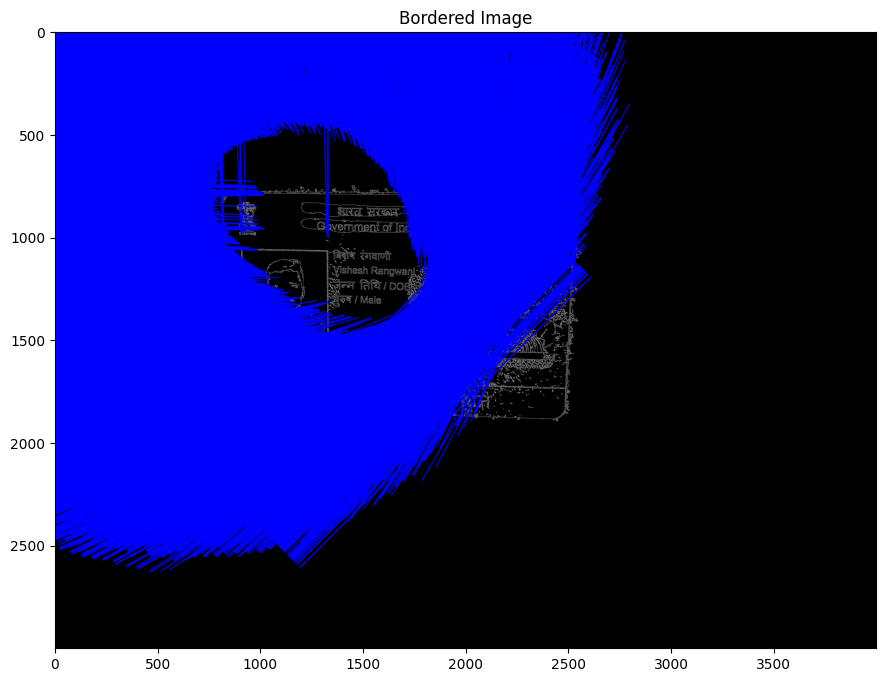

In [456]:
import math

# Convert to grayscale
gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)

# Apply canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
dstp = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Apply Hough line transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(dstp, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)
        
show_image("Bordered Image", dstp)

## Cropped Image

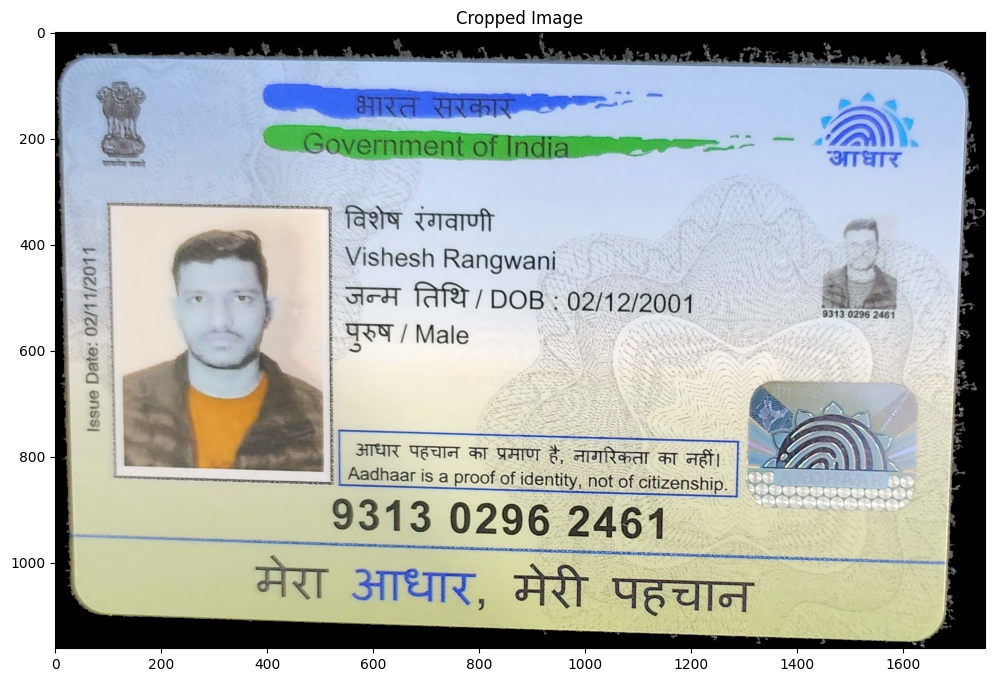

In [457]:
gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour = max(contours, key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(largest_contour)

crop_img = final_image[y:y+h, x:x+w]

show_image("Cropped Image", crop_img)


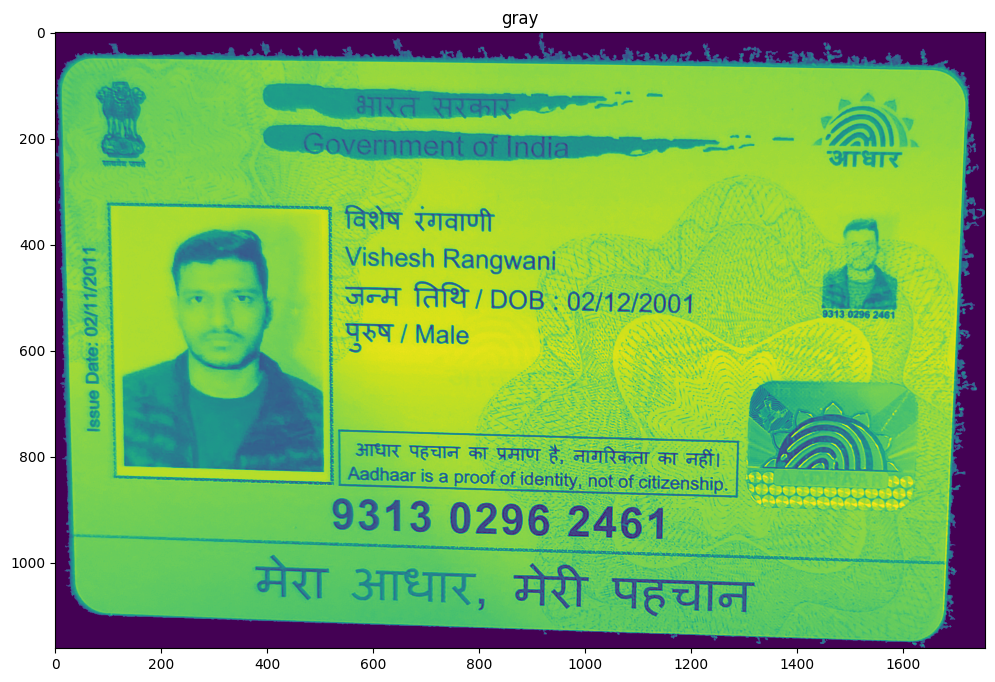

In [458]:
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
show_image("gray", gray)
ret, thresh = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)


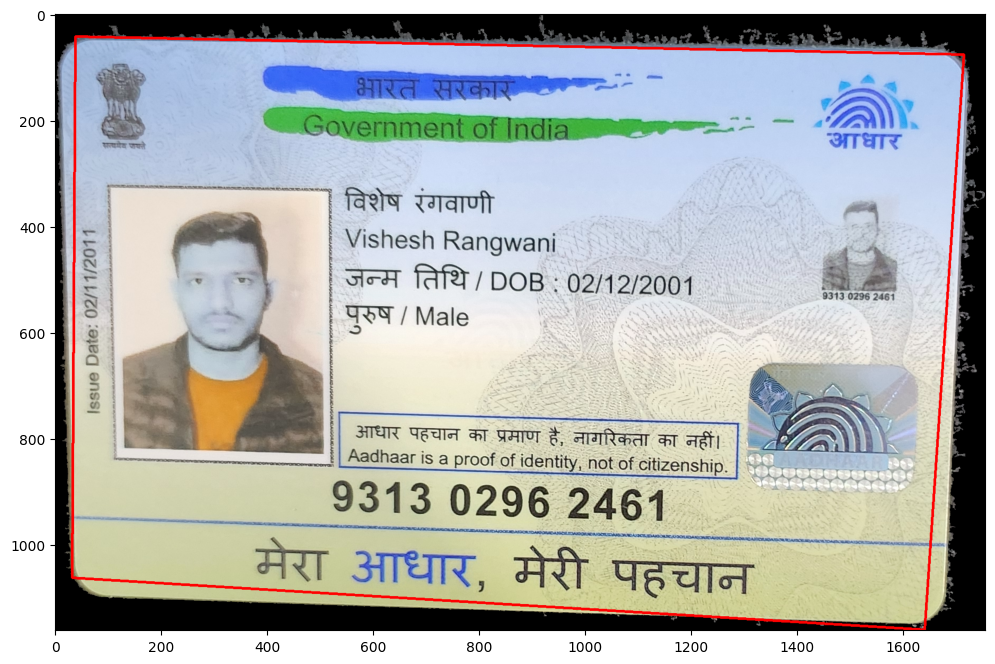

In [459]:
for contour in contours:
    # we approximate the contour
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
    # if we found a countour with 4 points we break the for loop
    # (we can assume that we have found our document)
    if len(approx) == 4:
        doc_cnts = approx
        break
        
# We draw the contours on the original image not the modified one
all_contours = crop_img.copy()
cv2.drawContours(all_contours, [doc_cnts], -1, (255, 0, 0), 3)

plt.imshow(all_contours)
plt.show()

In [460]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

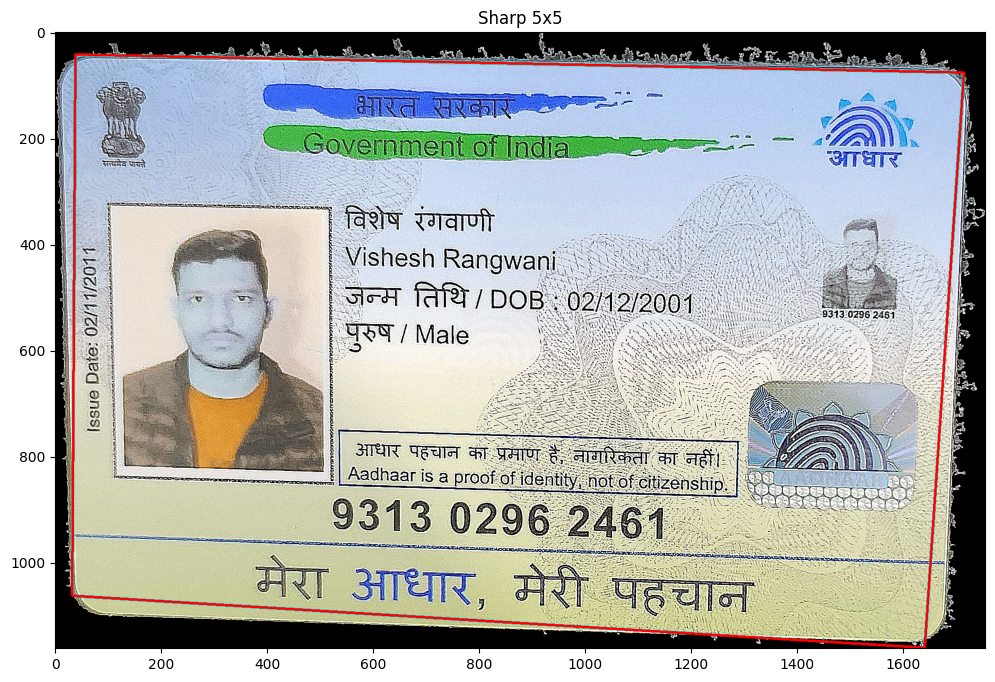

In [461]:
def unsharp_mask(image, kernel_size=(3, 3), sigma=20.0, amount=10.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

sharp = unsharp_mask(all_contours)
show_image("Sharp 5x5", sharp)

In [462]:
warped = four_point_transform(sharp, doc_cnts.reshape(4, 2))
warped_color = warped.copy()
# convert the warped image to grayscale
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# Extracting text from cropped image
out_below = pytesseract.image_to_string(warped)
print(out_below)

ee
=
=)
WN
=
are
a
=
NN

Issue Date

Sena acin en Plains Ons ACRE ETO

sonnd encet tsa Pa) AS ALAT




In [463]:
# # show_image("kajsnfd", sharp)
# cv2.imshow("Output", sharp)
# cv2.waitKey(0)

In [464]:
cv2.imwrite("final.jpg", sharp)

True

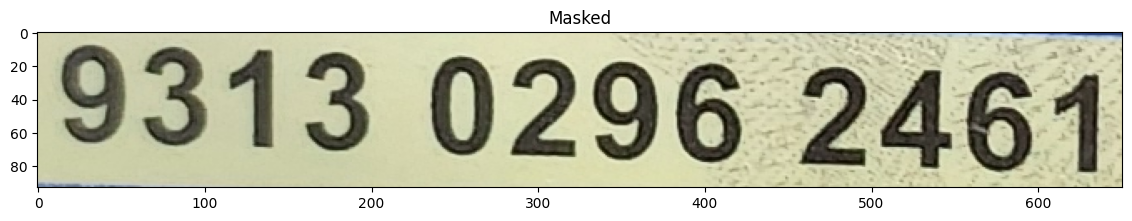

In [465]:
imgShow = all_contours.copy()
imgMask = np.zeros_like(imgShow)
x0 = 509
y0 = 872
x1 = 1160
y1 = 965

cv2.rectangle(imgMask, (x0, y0), (x1, y1), (255, 255, 255), cv2.FILLED)
imgShow = cv2.addWeighted(imgShow, 0.99, imgMask, 0.2, 0)

imgCrop = all_contours[y0:y1, x0:x1]

show_image("Masked", imgCrop)

In [466]:
print(pytesseract.image_to_string(imgCrop))

9313 0296 2461



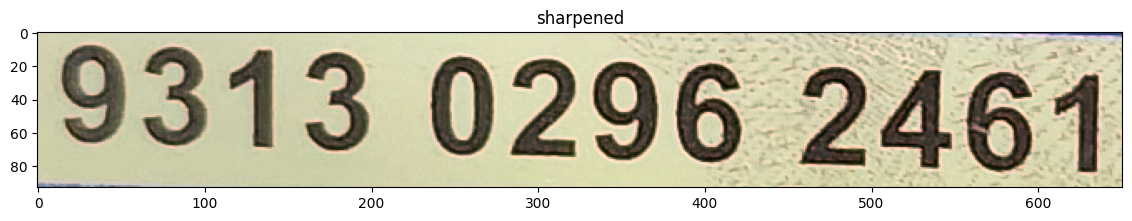

In [473]:
blur = cv2.GaussianBlur(imgCrop, (5, 5), 0)

# Subtract the blurred image from the original image to get an edge mask
edge_mask = cv2.subtract(imgCrop, blur)

# Scale the edge mask to increase the intensity of the edges
edge_mask = cv2.multiply(edge_mask, 2)

# Add the edge mask back to the original image to sharpen it
sharpened = cv2.add(imgCrop, edge_mask)

show_image("sharpened", sharpened)

In [474]:
print(pytesseract.image_to_string(sharpened))

9313 0296 2461

